In [41]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# M1 Science et Ingénieurie des données
# Université de Rouen Normandie
# T. Paquet
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy.linalg import norm

colors =['r','b','g','c','m','o']
n_colors = 6


def my_kmeans(X,K,Visualisation=False,Seuil=0.001,Max_iterations = 100):
    
    N,p = np.shape(X)
    iteration = 0        
    Dist=np.zeros((K,N))
    J=np.zeros(Max_iterations+1)
    J[0] = 10000000
    
    # Initialisation des clusters
    # par tirage de K exemples, pour tomber dans les données     
 
    Index_init = np.random.choice(N, K,replace = False)
    C = np.zeros((p,K))
    for k in range(K):
        C[:,k] = X[Index_init[k],:].T 
        
        
    while iteration < Max_iterations:
        iteration +=1
        #################################################################
        # E step : estimation des données manquantes 
        #          affectation des données aux clusters les plus proches
        for k in range(K):
            Dist[k,:]=np.linalg.norm(X-C[:,k],axis=1)**2
        y=np.argmin(Dist,axis=0)
        #################################################################
        # M Step : calcul des meilleurs centres          
        for k in range(K):
              C[:,k]=np.mean(X[y==k,:],axis=0)
        #################################################################
        # test du critère d'arrêt l'évolution du critère est inférieure 
        # au Seuil en pour ceent
        J[iteration]=np.sum(np.min(Dist[y,:],axis=0))/N

        if np.abs(J[iteration]-J[iteration-1])/J[iteration-1]<Seuil:
             break;
    return C, y,J[1:iteration]

In [232]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# M1 Science et Ingénieurie des données
# Université de Rouen Normandie
# T. Paquet
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy.linalg import norm

colors =['r','b','g','c','m','o']
n_colors = 6


def my_kmean_medoide(X,K,Visualisation=False,Seuil=0.0001,Max_iterations = 100):
    
    N,p = np.shape(X)
    iteration = 0        
    Dist=np.zeros((K,N))
    J=np.zeros(Max_iterations+1)
    J[0] = 10000000
    
    # Initialisation des clusters
    # par tirage de K exemples, pour tomber dans les données     
 
    C=initPlusPlus(X,K)
        
    while iteration < Max_iterations:
        iteration +=1
        #################################################################
        # E step : estimation des données manquantes 
        #          affectation des données aux clusters les plus proches
        for k in range(K):
            Dist[k,:]=np.linalg.norm(X-C[:,k],axis=1)**2
        y=np.argmin(Dist,axis=0)
        #################################################################
        # M Step : calcul des meilleurs centres          
        for k in range(K):
              c_k=X[y==k]
              dist=np.array([sum([np.linalg.norm(c_k[j]-c_k[i])**2 for i in range(len(c_k))]) for j in range(len(c_k))])
              C[:,k]=c_k[np.argmin(dist)]
        #################################################################
        # test du critère d'arrêt l'évolution du critère est inférieure 
        # au Seuil en pour ceent
        J[iteration]=np.sum(np.min(Dist[y,:],axis=0))/N

        if np.abs(J[iteration]-J[iteration-1])/J[iteration-1]<Seuil:
             break;
    return C, y,J[1:iteration]

In [3]:
[[(i,j) for i in range(3)] for j in range(1,4)]

[[(0, 1), (1, 1), (2, 1)], [(0, 2), (1, 2), (2, 2)], [(0, 3), (1, 3), (2, 3)]]

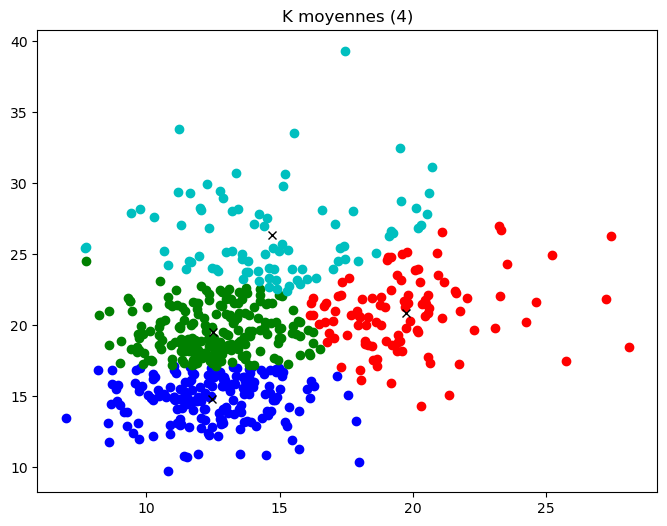

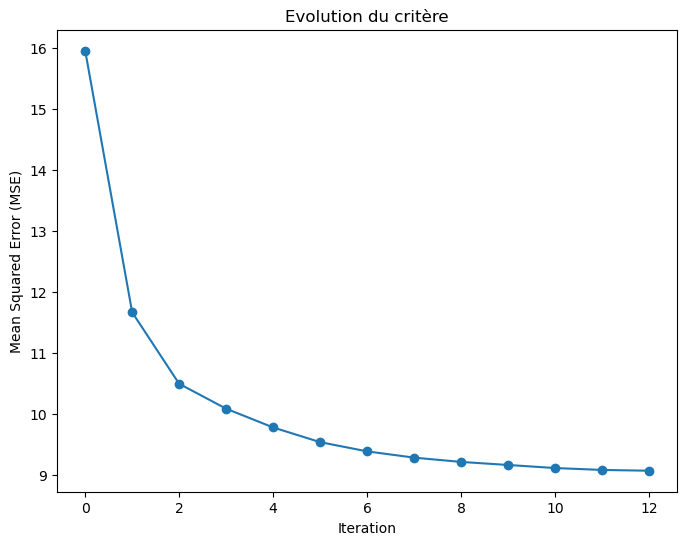

In [98]:
# iris = datasets.load_iris()
# X = iris.data[:, :2]
visalisationn(Y,my_kmeans,4)

In [20]:
def visalisationn(X,methode,K):
    colors =['r','b','g','c','m','o']
    n_colors = 6
    # we only take the first two features.
    # y = iris.target
    # fig = plt.figure(2, figsize=(8, 6))
    # plt.clf()
    # plt.scatter(X[0:50, 0], X[0:50, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[0])
    # plt.scatter(X[50:100, 0], X[50:100, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[1])
    # plt.scatter(X[100:150, 0], X[100:150, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[2])
    
    # plt.xlabel('Sepal length')
    # plt.ylabel('Sepal width')
    # plt.legend(scatterpoints=1)


    Cluster, y, Critere = methode(X,K,Visualisation = False)
    
    # Cluster, y, Critere = my_kmeans(iris.data,K,Visualisation = False)
    
    fig = plt.figure(3, figsize=(8, 6))
    for k in range(K):
        plt.plot(X[y==k, 0], X[y==k, 1], colors[k%n_colors]+'o')
    plt.plot(Cluster[0, :], Cluster[1, :],'kx')
    plt.title('K moyennes ('+str(K)+')')
    plt.savefig('fig_TP9')
    plt.show()
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(Critere, 'o-')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Evolution du critère')
    plt.savefig('critere.png')
    plt.show()
    

In [118]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# M1 Science et Ingénieurie des données
# Université de Rouen Normandie
# T. Paquet
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy.linalg import norm

###########################################################################
# initialisation ++ du kmeans
#
def initPlusPlus(X,K):
    N,p = np.shape(X)
    C = np.zeros((p,K))
    generator = np.random.default_rng()
    
    index = np.random.choice(N, 1,replace = False)
    liste_index = [index]
    C[:,0] = X[index,:]
    X = np.delete(X,index,0)
    # print("k=0 C[k]=",C[:,0],"index=",index)
    k=1
    
    while k < K:
        
        # calcul des distances
        NN = X.shape[0]
        dist = np.zeros(NN)
        for n in range(NN):
            D=C[:,:k]-np.repeat(X[n,:],k).reshape(p,k)
            D=np.diag(D@D.T)
            dist[n]=np.min(D)
       # ICI ..... 
        # calcul des probabilités
        proba=dist/np.sum(dist)
        range_value=generator.random((1))[0]
        intervals=np.cumsum(proba)
        index=0
        while index<NN:
            if intervals[index]>range_value:
                break;
            index+=1
        # ICI ....
        
        # tirage aléatoire selon proba
        C[:,k]=X[index,:]
        X=np.delete(X,index,0)
        k+=1
       # ICI ...........
    return C
#----------------K-mean++-------------------------------
def my_kmeans_plus_plus(X,K,Visualisation=False,Seuil=0.001,Max_iterations = 100):
    
    N,p = np.shape(X)
    iteration = 0        
    Dist=np.zeros((K,N))
    J=np.zeros(Max_iterations+1)
    J[0] = 10000000
    C=initPlusPlus(X,K)
        
    while iteration < Max_iterations:
        iteration +=1
        #################################################################
        # E step : estimation des données manquantes 
        #          affectation des données aux clusters les plus proches
        for k in range(K):
            Dist[k,:]=np.linalg.norm(X-C[:,k],axis=1)**2
        y=np.argmin(Dist,axis=0)
        #################################################################
        # M Step : calcul des meilleurs centres          
        for k in range(K):
              C[:,k]=np.mean(X[y==k,:],axis=0)
        #################################################################
        # test du critère d'arrêt l'évolution du critère est inférieure 
        # au Seuil en pour ceent
        J[iteration]=np.sum(np.min(Dist[y,:],axis=0))/N

        if np.abs(J[iteration]-J[iteration-1])/J[iteration-1]<Seuil:
             break;
    return C, y,J[1:iteration]

In [51]:
visalisationn(my_kmeans,3)

TypeError: visalisationn() missing 1 required positional argument: 'K'

C:\Users\Souniz\AppData\Local\Temp\ipykernel_7604\67849841.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[0:50, 0], X[0:50, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[0])
C:\Users\Souniz\AppData\Local\Temp\ipykernel_7604\67849841.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[50:100, 0], X[50:100, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[1])
C:\Users\Souniz\AppData\Local\Temp\ipykernel_7604\67849841.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[100:150, 0], X[100:150, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[2])


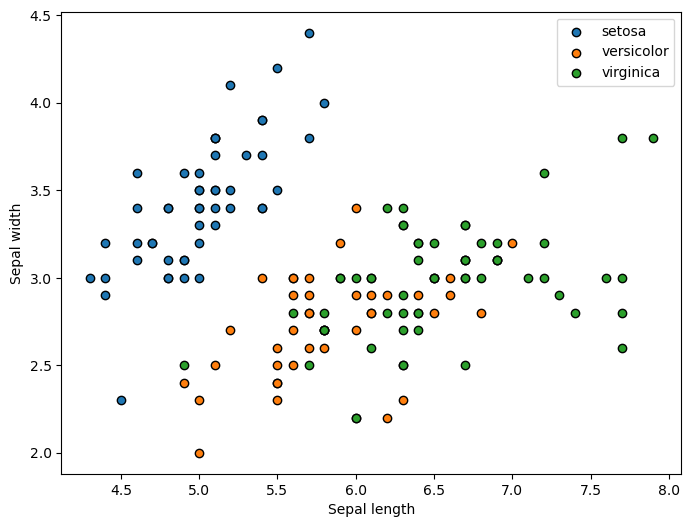

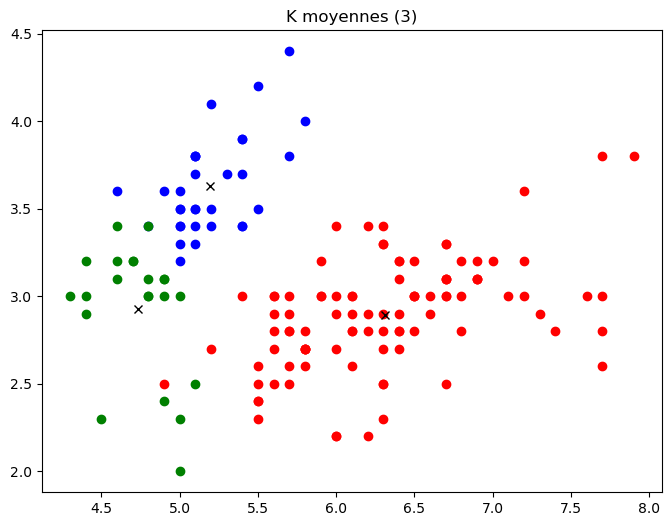

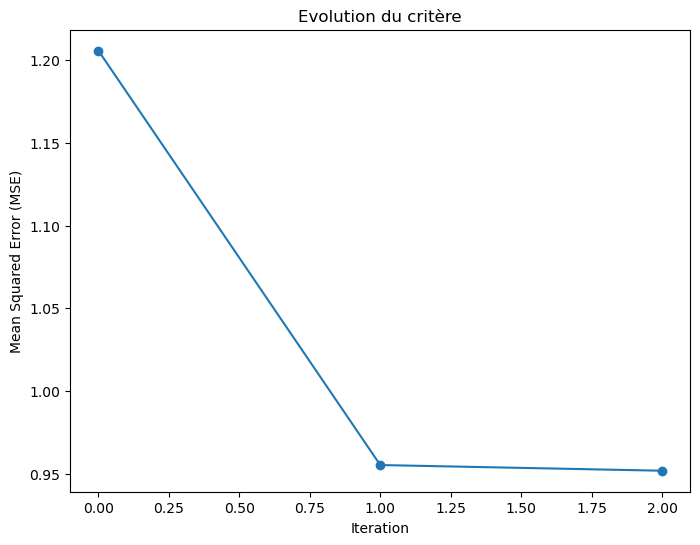

In [7]:
visalisationn(my_kmeans_plus_plus,3)

In [63]:
def qualite_regroupement(X,methode,k):
    Cluster, y, Critere = methode(X,k,Visualisation = False)
    Ik=np.array([np.sum((X[y==k]-Cluster[:,k])**2)/len(X[y==k]) for k in range(len(Cluster[0]))])
    Iw=np.sum([(len(X[y==k])*Ik[k])/len(X) for k in range(k)])
    Ib=np.sum([(len(X[y==k])/len(X))*(X.mean(axis=0)-Cluster[:,k])**2 for k in range(k)])
    It=Iw+Ib
    C=100*(1-(Iw/It))
    return C,k

In [68]:
qualite_regroupement(X,my_kmeans,3)

(71.57601498376238, 3)

In [242]:
qualite_regroupement(X,my_kmean_medoide,3)

(87.82608729294603, 3)

In [99]:
qualite_regroupement(X,my_kmean_medoide,3)
k

NameError: name 'my_kmean_medoide' is not defined

In [156]:
iris = datasets.load_iris()
X=iris.data

In [96]:
Y=datasets.load_breast_cancer(return_X_y=False, as_frame=False)['data'][:,:2]

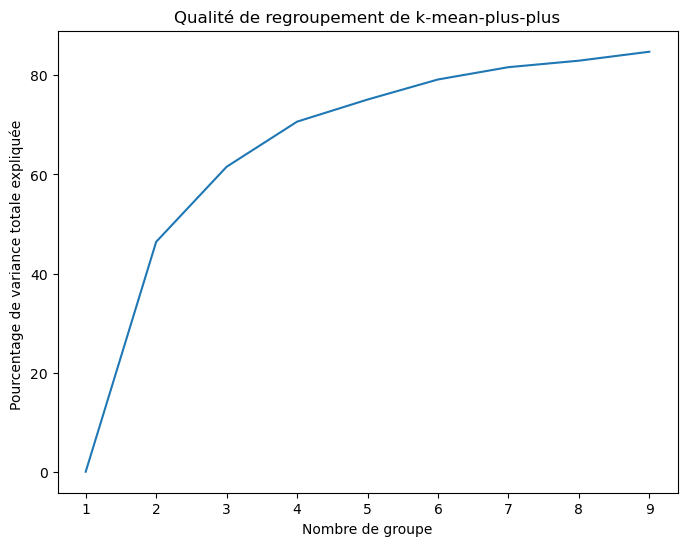

In [190]:
q=np.array([qualite_regroupement(Y,my_kmeans_plus_plus,k) for k in range(1,10)])
fig = plt.figure(figsize=(8, 6))
plt.xlabel('Nombre de groupe')
plt.ylabel('Pourcentage de variance totale expliquée ')
plt.title('Qualité de regroupement de k-mean-plus-plus')
plt.plot([i[1] for i in q],[i[0] for i in q])
plt.savefig('qualite')
plt.show()

In [ ]:
q=np.array([qualite_regroupement(Y,my_kmean_medoide,k) for k in range(1,10)])
fig = plt.figure(figsize=(8, 6))
plt.xlabel('Nombre de cluster')
plt.ylabel('Critères de qualité d’un regroupement')
plt.title('Qualité de regroupement de k-medoide')
plt.plot([i[1] for i in q],[i[0] for i in q])
plt.savefig('qualite')
plt.show()

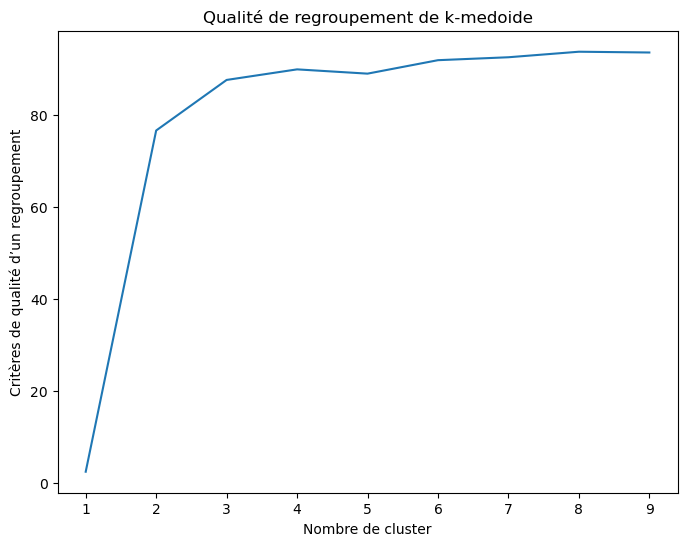

In [254]:
q=np.array([qualite_regroupement(X,my_kmean_medoide,k) for k in range(1,10)])
fig = plt.figure(figsize=(8, 6))
plt.xlabel('Nombre de cluster')
plt.ylabel('Critères de qualité d’un regroupement')
plt.title('Qualité de regroupement de k-medoide')
plt.plot([i[1] for i in q],[i[0] for i in q])
plt.show()

In [212]:
Y=datasets.load_breast_cancer(return_X_y=False, as_frame=False)['data'][:,:2]
Y

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

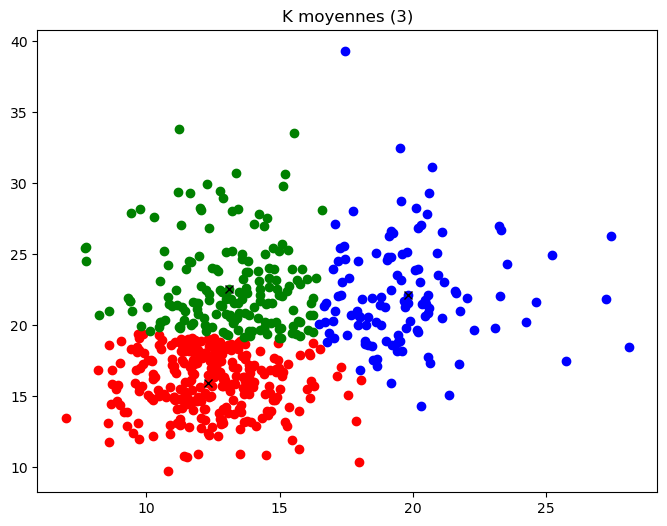

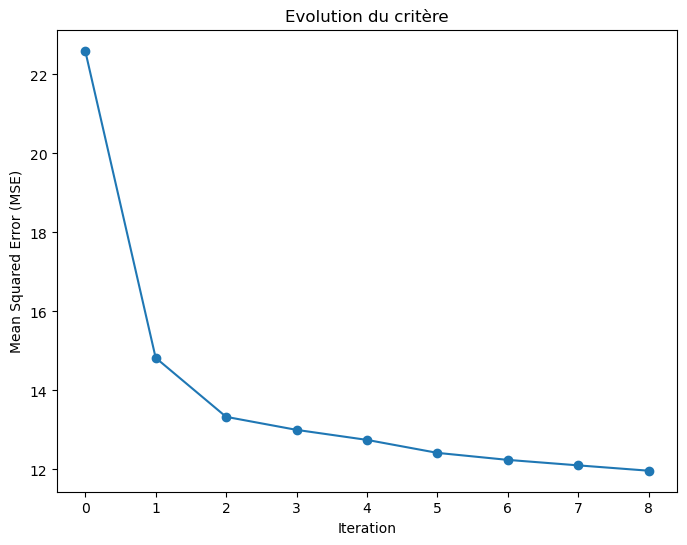

In [250]:
visalisationn(Y,my_kmean_medoide,3)